In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("car_age_price.csv")

In [7]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [10]:
df.shape

(112, 2)

In [12]:
X = df[['Year']]
y = df['Price']

In [13]:
X

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [14]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

Linear Regression Model

In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [17]:
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Linear Regression Mean Squared Error: {linear_mse}')

Linear Regression Mean Squared Error: 3427014280.295892


Visualize the Linear Relationship

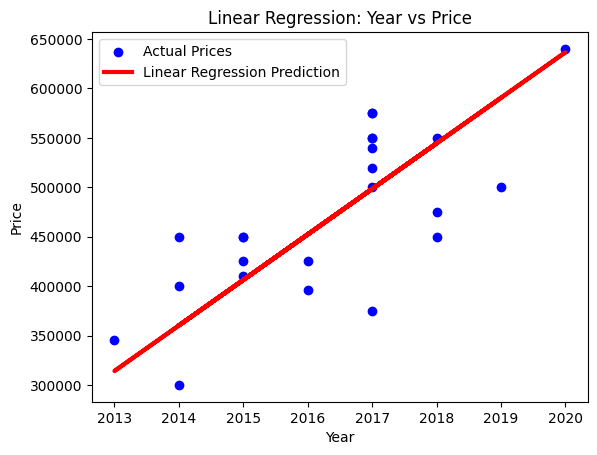

In [23]:
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, linear_predictions, color='red', linewidth=3, label='Linear Regression Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression: Year vs Price')
plt.legend()
plt.show()


Lasso Regression Model

In [19]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

lasso_predictions = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Regression Mean Squared Error: {lasso_mse}')

Lasso Regression Mean Squared Error: 3427011598.4606404


Predict the Price of a 2022 Model

In [20]:
year_2022 = np.array([[2022]])

linear_price_2022 = linear_model.predict(year_2022)
lasso_price_2022 = lasso_model.predict(year_2022)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


 Compare Performance

In [21]:
if linear_mse < lasso_mse:
    print('Linear Regression performs better.')
else:
    print('Lasso Regression performs better.')


Lasso Regression performs better.
